#HDS 5210 - 2024 - Final Project

###Project Description
This data analysis project examines the intersection of childhood obesity trends and nutrition program effectiveness across the United States, utilizing two comprehensive datasets: obesity data among the children aged 2-19 years basis on the National Health and Nutrition Examination Survey (NHANES) and nutrition data of the Women, Infant, and Child (WIC) program. The project uses different transformative and analytical procedures to find patterns in the obesity trends in relation to demographic characteristics, geographical areas, and time-line, as well as assessing the extent and effectiveness of nutrition interventions.

There are varied kinds of data transformations and aggregations to undergo to produce the analysis pipeline. Critical measures are sex, age group development of categories, computation of mean obesity prevalence across the racial/ethnic classifications, and assessment of nutrition program engagement across the states. The project employs several types of plots, such as obesity trend plots, plots of the distribution of the nutritional indicators by states, and plots of the seven-year participation rates by the states. To conduct outcome analysis of program participation and obesity, data integration strategies was used to merge obesity and nutrition datasets.

analysis encompasses simple mathematical computations and computation using advanced machine learning algorithms. ETSs range from confidence intervals for obesity statistics for children and adolescents of different age and other demographic characteristics. The project applies the regression analysis in the prediction of obesity rate and in the determination of association between variables and their use of proper hyperparameters. The results show that obesity and program participation differ according to demographic characteristics and areas, where adolescents have the highest obesity levels and large variation in program enrollment by states. The information helps health practitioners and policy makers who are engaged in the effort of reducing childhood obesity through specific intervention measures and effective program modification.

##Dataset 1 -
One of the useful datasets is “Obesity Among Children and Adolescents Aged 2-19 Years” where all the information concerning obesity in children and adolescents in the United States is provided with the additional information for differentiation by certain characteristics. The data used in this paper is also from NHANES, on obesity in children and adolescents within the age of 2 to 19 years based on their race/ethnicity and SES. It embraces the obesity rates besides standard errors and intervals of confidence with which the obesity rates can be analyzed with precision across groups. The dataset covers several years allowing scholars as well as healthcare providers to analyze fluctuations in the prevalence of childhood obesity. The present study has measures age groups, gender, race/ethnicity, main income and education levels of heads of households, making it useful in the identification of health inequalities in populace, which would help to guide interventions in populace health programs.

Link: https://catalog.data.gov/dataset/obesity-among-children-and-adolescents-aged-219-years-by-selected-characteristics-united-s-3ead4

##Dataset 2 -  
Nutrition, Physical Activity, and Obesity – Women, Infant, and Child or WIC data offer data on the federal assistance program in WIC for expecting women, breastfeeding mothers and children below the age of five who have low income in United States. The dataset covers the important indicators concerning the nutrition status, physical activity and obesity rates among WIC participants by state and over time, where possible.

The dataset also has the demographic data such as age in months and in days, gender, and race and ethnicity The specific data include breastfeeding rates, nutritional status, and growth which are considered measures. It contains confidence limits, sample sizes, and GeoLocation coordinates, and therefore, it is useful for spatial analysis and program evaluation. It remains to be divided by state or for the entire nation allowing various possible additional breakdowns that would enable to analyse the effectiveness of the program and the presence and extent of health disparities by even finer subgroups of the population. The information is very helpful to public health personnel, policy makers, and academics who seek to learn of the existing and emerging nutrition concerns affecting the vulnerable groups.

Link: https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-women-infant-and-child

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_excel= pd.read_excel("/content/Obesity_among_children_and_adolescents_aged_2_19_years__by_selected_characteristics__United_State.xlsx")
data_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       840 non-null    object 
 1   PANEL           840 non-null    object 
 2   PANEL_NUM       840 non-null    int64  
 3   UNIT            840 non-null    object 
 4   UNIT_NUM        840 non-null    int64  
 5   STUB_NAME       840 non-null    object 
 6   STUB_NAME_NUM   840 non-null    int64  
 7   STUB_LABEL_NUM  800 non-null    float64
 8   STUB_LABEL      840 non-null    object 
 9   YEAR            840 non-null    object 
 10  YEAR_NUM        840 non-null    int64  
 11  AGE             840 non-null    object 
 12  AGE_NUM         840 non-null    float64
 13  ESTIMATE        673 non-null    float64
 14  SE              673 non-null    float64
 15  FLAG            206 non-null    object 
dtypes: float64(4), int64(4), object(8)
memory usage: 105.1+ KB


In [45]:
data_excel.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL_NUM,STUB_LABEL,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
0,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0.0,2-19 years,1988-1994,1,2-19 years,0.0,10.0,0.5,NaN
1,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0.0,2-19 years,1999-2002,2,2-19 years,0.0,14.8,0.7,NaN
2,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0.0,2-19 years,2001-2004,3,2-19 years,0.0,16.3,0.8,NaN
3,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0.0,2-19 years,2003-2006,4,2-19 years,0.0,16.3,0.9,NaN
4,Obesity among children and adolescents aged 2-...,2-19 years,1,"Percent of population, crude",1,Total,0,0.0,2-19 years,2005-2008,5,2-19 years,0.0,16.2,0.9,NaN


In [46]:
data_csv = pd.read_csv("/content/Nutrition__Physical_Activity__and_Obesity_-_Women__Infant__and_Child.csv")
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12852 entries, 0 to 12851
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   12852 non-null  int64  
 1   YearEnd                     12852 non-null  int64  
 2   LocationAbbr                12852 non-null  object 
 3   LocationDesc                12852 non-null  object 
 4   Datasource                  12852 non-null  object 
 5   Class                       12852 non-null  object 
 6   Topic                       12852 non-null  object 
 7   Question                    12852 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             12852 non-null  object 
 10  Data_Value                  12473 non-null  float64
 11  Data_Value_Alt              12473 non-null  float64
 12  Data_Value_Footnote_Symbol  379 non-null    object 
 13  Data_Value_Footnote         379

In [47]:
data_csv.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2018,2018,WA,Washington,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,"(47.52227862900048, -120.47001078999972)",OWS,OWS1,Q060,VALUE,53,Age (months),18 - 23,AGEMO,AGEMO1823
1,2018,2018,HI,Hawaii,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,"(21.304850435000446, -157.85774940299973)",OWS,OWS1,Q060,VALUE,15,Race/Ethnicity,Hispanic,RACE,RACEHIS
2,2020,2020,MA,Massachusetts,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,"(42.27687047000046, -72.08269067499964)",OWS,OWS1,Q040,VALUE,25,Race/Ethnicity,Hispanic,RACE,RACEHIS
3,2020,2020,TN,Tennessee,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,"(35.68094058000048, -85.77449091399967)",OWS,OWS1,Q040,VALUE,47,Race/Ethnicity,Hispanic,RACE,RACEHIS
4,2012,2012,GU,Guam,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q041,VALUE,66,Gender,Male,GEN,MALE


In [48]:
# Clean obesity data
obesity_data = data_excel.copy()
obesity_data['YEAR'] = obesity_data['YEAR'].astype(str)
obesity_data = obesity_data.dropna(subset=['ESTIMATE'])

# Clean nutrition data
nutrition_data = data_csv.copy()
nutrition_data = nutrition_data.dropna(subset=['Data_Value'])

#Transformations on Data

Data Transform 1: Filtering the obesity database also eradicates existing issues of inclusion of outdated and irrelevant data concerning racial and ethnical disparities impacting childhood obesity. This way it eliminates any anachronistic data that may hinder its analysis hence using data from 2015 and onwards which is more likely to capture today’s health status and social demographic characteristics. Depending on ’STUB_NAME’ filter it filters the data just regarding race and Hispanic origin which is like a vital factor when studying the variations in health across the different groups. This filtered dataset allows view of current weight trends within various racial/ethnic groups to inform present campaigns and policies geared at reducing heath disparities across the population. When there is a strong focus on the recent timeframe and concern with racial/ethnic disparities, the findings are more relevant for guiding present day public health practice.

Data Transform 2: This transformation produces more realistic age divisions in the nutrition dataset since the detailed monthly age is transformed to clinically useful age categories. The code uses a lambda function to categorize children into three distinct groups: into infants (0-12 months), toddlers (13-24 months) and others, the resultant data is more understandable and is well in concordance with the traditional divisions of the young children’s developmental eras. Although WIC program categories the monthly data according to age in months, grouping it in months is more practical for analysis of age-oriented nutrition and feeding that differs significantly for infants and toddlers. In addressing missing values that is by using the pd.notna() the clean lower bound of age bands ensures the transformation of age is clean and reliable while still preserving the integrity of the dataset.

Data Transform 3: This transformation converts the means of obesity across different racial and ethnic groups by using groupby on ‘STUB_LABEL’ (which Contains race/ethnicity) and take the mean of ‘ESTIMATE’ (percentage of obesity). The code offers a distilled, written narration of obesity levels on different demography making it easy to pull out racial and ethnic disparities of childhood obesity. The grouped data is often more convenient to be in the standard DataFrame format and for this reason the reset_index() function is used. This aggregated level is instrumental for the health department staff, as well as policymakers, to investigate inequalities in children obesity and design suitable interventions.

Data Transform 4: It also summarizes nutrition data by calculating the mean of the ‘Data_Value’ (nutrition indicators) for each state through the group by ‘LocationDesc’ (state locations). Its aim is to generate a geographic display of nutritional indices in order to compare nutritional outcome and program performance between various states in the United States. Since mean values give summarised and easy to interpret data, and since reset_index() results in a standard format of a data frame, the code generates a simplistic yet useful view of nutrition patterns that exist in each state; these are crucial when it comes to undertake geographic disparities in nutrition where the WIC program needs to act as a baseline for policy interventions to be implemented on state level.

Data Transform 5: This transformation leads to a create-temporal-analysis-of-obesity-rates-by-racial-and-ethnic-subgroups-in(continental-‘USA’)-by-years Table using pivot table view resulting in stew label of race/ethnicity and year numbers using estimate mean for obesity percentage in each combination. By using the pivot_table function the long form data is easily converted to the wide form for clear observation and analysis of the obesity rates for each R/E group over time. Such restructured format is most useful to track temporal changes, which subgroup among populations have increased or reduced the rate of obesity most drastically and how effective such interventional methods are in addressing obesity epidemic for various demographic populations at different time points.

In [49]:
# Transform 1: Filter obesity data for recent years and relevant categories
recent_obesity = obesity_data[
    (obesity_data['YEAR_NUM'] >= 2015) &
    (obesity_data['STUB_NAME'] == 'Race and Hispanic origin')
]

In [50]:
# Transform 2: Create age group categories in nutrition data
nutrition_data['Age_Group'] = nutrition_data['Age(months)'].apply(
    lambda x: '0-12 months' if pd.notna(x) and int(x.split('-')[0]) <= 12
    else '13-24 months' if pd.notna(x) and int(x.split('-')[0]) <= 24
    else 'Other'
)


In [51]:
# Transform 3: Calculate average obesity rates by race
obesity_by_race = recent_obesity.groupby('STUB_LABEL')['ESTIMATE'].mean().reset_index()

In [52]:
# Transform 4: Calculate nutrition metrics by state
nutrition_by_state = nutrition_data.groupby('LocationDesc')['Data_Value'].mean().reset_index()

In [53]:
# Transform 5: Create year-over-year changes in obesity rates
obesity_trends = obesity_data.pivot_table(
    index='STUB_LABEL',
    columns='YEAR_NUM',
    values='ESTIMATE',
    aggfunc='mean'
).reset_index()

#Visualizations
**Visualization 1: Time Series of Obesity Rates by Age Group:** This line graph is used to represent the obesity status of the children and adolescents with regard to the different age groups employed, over a 10-year period. The plot tracks four distinct age groups: Children and adolescents between 12-19 years, 2-19 years, 2-5 years, and 6- 11 years using different coloured lines. Some of the emerging patterns reveal that the 12-19 year and 6-11 year age groups sustain a higher obesity level across the years and reaches approximately 21-22% in year 10 while the under 2-5 years strikes out between 8 to 15% across the years. Every age group shows a general upward tendency in obesity rates in the course of the years with some variations In all the age groups, the most scattered and highest increase is observed in the first two years followed by a slow and uneven rise or even a slight fall in some subsequent years in various age groups.

**Visualization 2: Geographic distribution of nutrition indicators:**This box plot shows mass point picture of nutrition indicators in different states of United States, where every box represents the state data distribution. The plot below illustrates that the value of the plot varies hugely both across and within states, and most of the states fall between 5 and 35. The blue boxes are the IQR where half of the data for each state is enclosed and the horizontal line within every box is the median. The ‘whiskers’ go through to show the overall distribution, where individual observations are considered to be outliers are given by circles above or below the ‘whisker’ line. The boxes and whiskers of some states (tall ones and long whiskers) indicate that the raw data of these states displays greater variability than others. Some of the states appear to have outlying values, especially on the upper side of the figure, thus indicating that some of the nutrition measurements may be rather extreme in these states. The middle values across states range from 10 to 20 and, while they mainly consist of these values, they do not represent an ideal normal distribution central tendency.

**Visualization 3: State-wise Nutrition Program Participation:** The below horizontal bar chart shows the average Nutrition program participation in different states/territories of the United States. Alaska follows Virginia with approximately 17.7%, while South Dakota emerged third with about 17%. Other states such as Wisconsin Iowa Delaware have above 15% participation rates. The further down we go in the chart we see a decline of the participation rates even though some of them are responding to the survey with around 10% participation from Colorado only. Participation by states plus territories such as Puerto Rico, Guam, and the Virgin Islands is included within this visualization list, and it shows the current picture of the nation. The vast majority of states fall in the participation range of 13-16 percent which denotes relatively established program participation across a sizable share of states in the country while the range of variation identified between the most and the least participating regions present a interesting study.

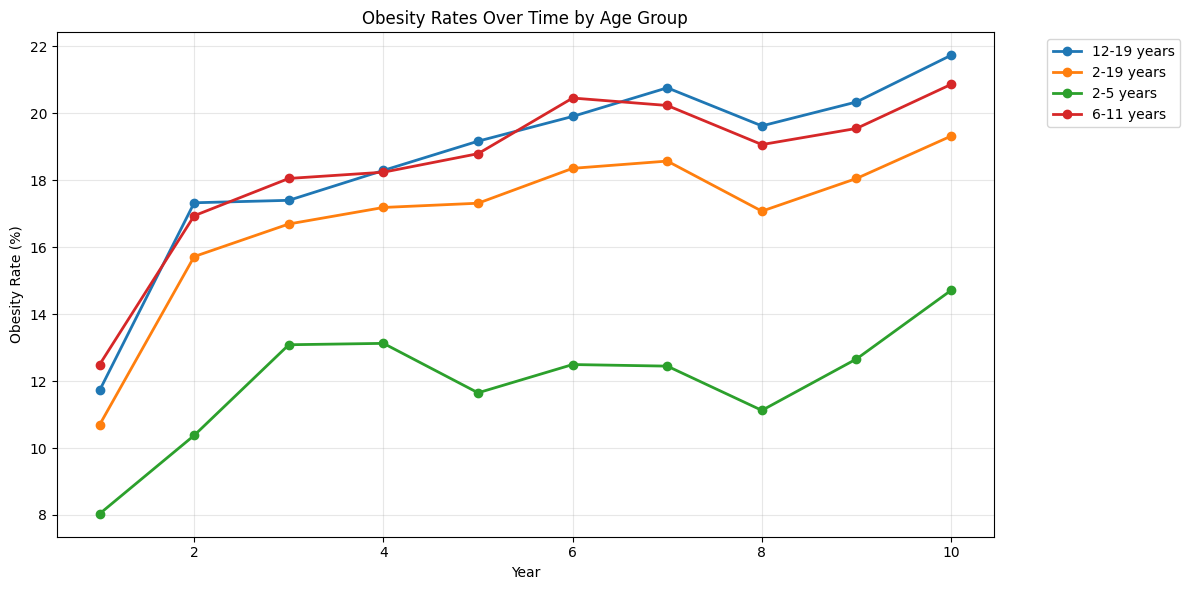

In [54]:
# Visualization 1: Time Series of Obesity Rates by Age Group
# First, prepare the data
age_time_data = obesity_data.groupby(['YEAR_NUM', 'AGE'])['ESTIMATE'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
for age in age_time_data['AGE'].unique():
    data = age_time_data[age_time_data['AGE'] == age]
    plt.plot(data['YEAR_NUM'], data['ESTIMATE'],
            marker='o',
            label=age,
            linewidth=2)

plt.title('Obesity Rates Over Time by Age Group')
plt.xlabel('Year')
plt.ylabel('Obesity Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

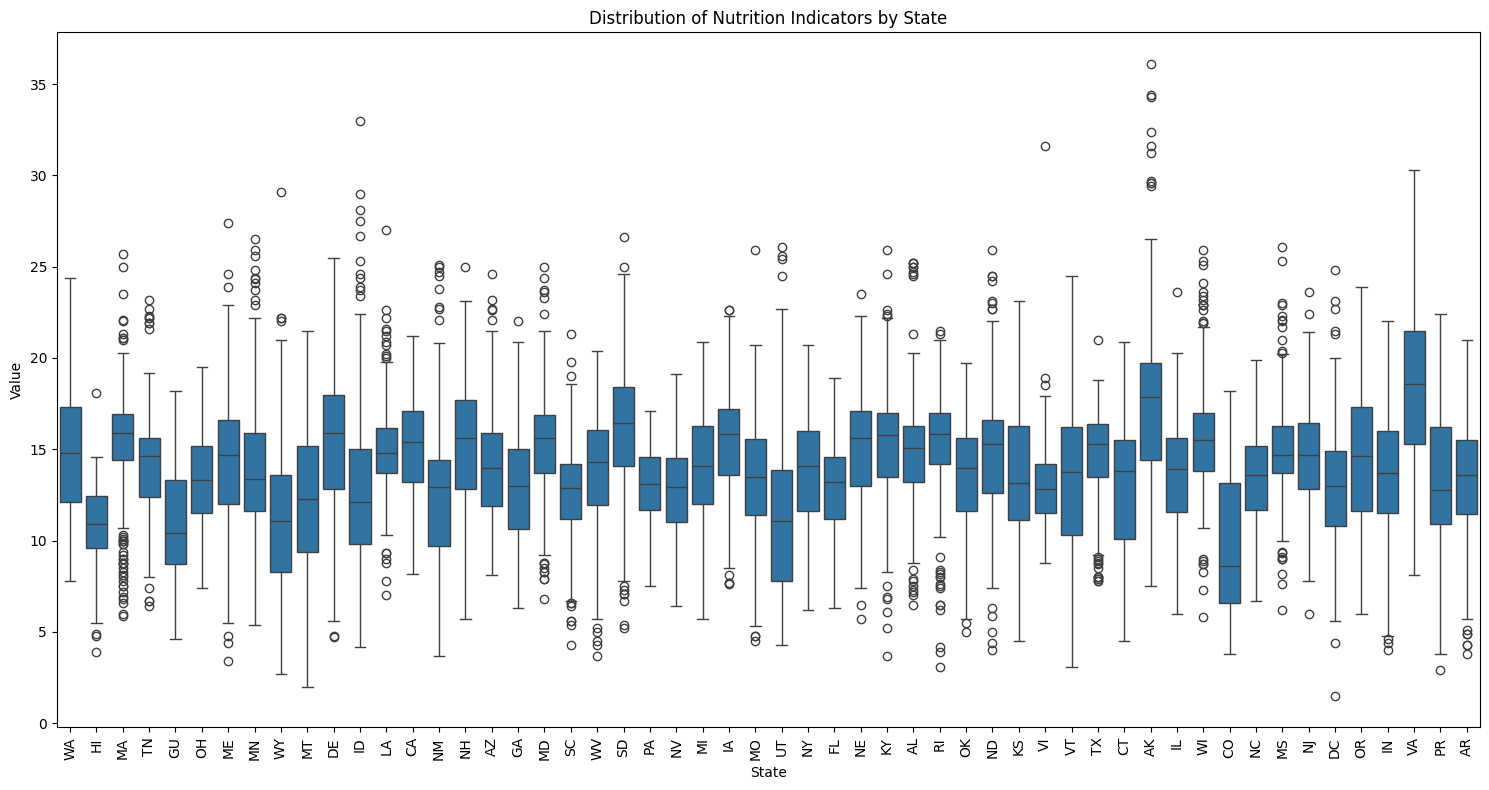

In [55]:
# Visualization 2: Geographic distribution of nutrition indicators
plt.figure(figsize=(15, 8))
sns.boxplot(data=nutrition_data, x='LocationAbbr', y='Data_Value')
plt.xticks(rotation=90)
plt.title('Distribution of Nutrition Indicators by State')
plt.xlabel('State')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

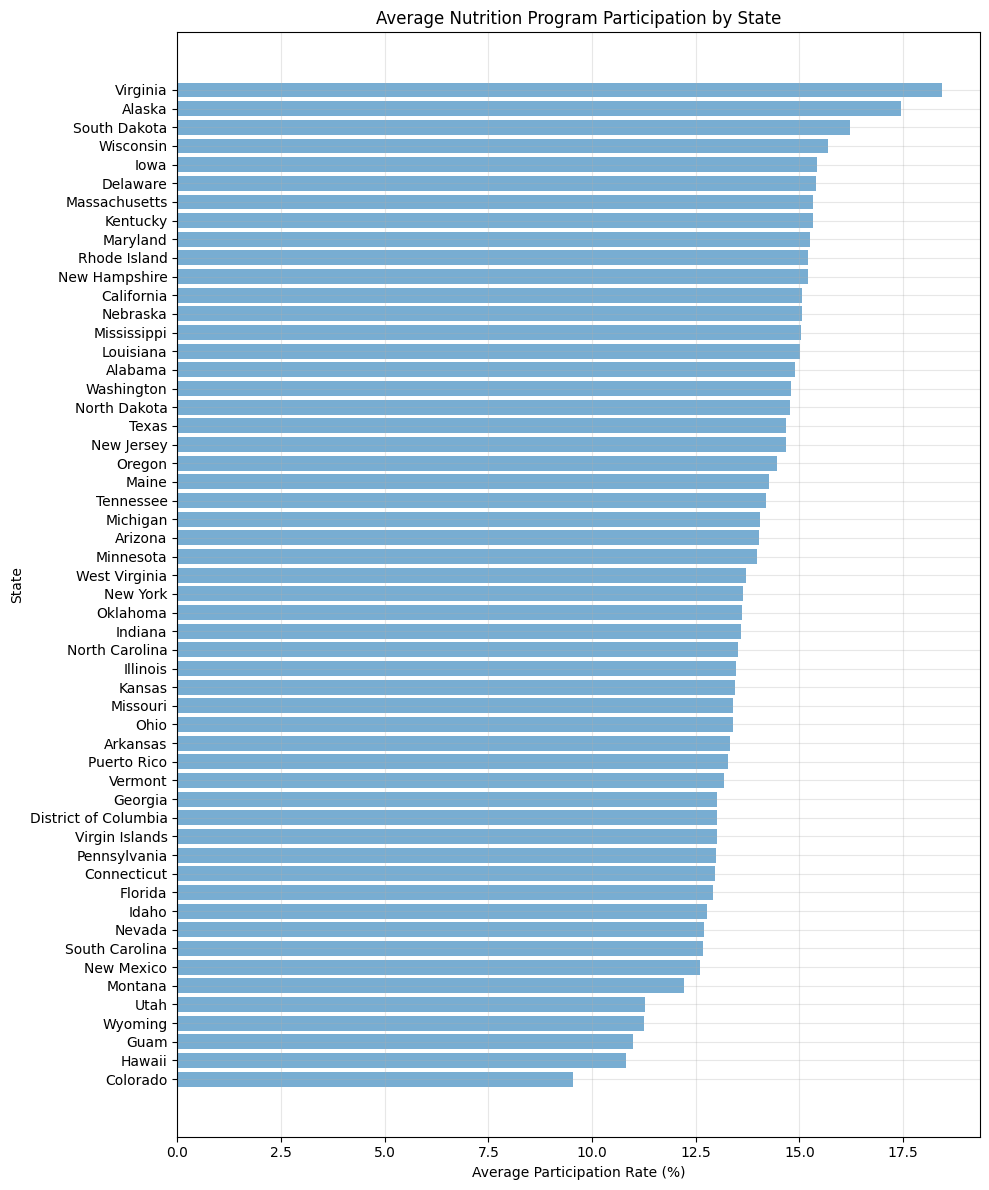

In [56]:
# Visualization 3: State-wise Nutrition Program Participation
# Prepare data
state_nutrition = nutrition_data.groupby('LocationDesc')['Data_Value'].agg([
    'mean',
    'count'
]).reset_index()

# Sort by mean value
state_nutrition = state_nutrition.sort_values('mean', ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(10, 12))
plt.barh(state_nutrition['LocationDesc'],
         state_nutrition['mean'],
         alpha=0.6)

plt.title('Average Nutrition Program Participation by State')
plt.xlabel('Average Participation Rate (%)')
plt.ylabel('State')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#Joins (or) Merging the Data

**Join 1:** This code accomplishes data integration process where the obesity and nutrition datasets are combined on the basis of the year and place. First, it performs dataset matching of nutrition by inserting ‘Year’ in the nutrition set from ‘YearStart’ as well as inserting ‘State’ column in obesity set with a value ’United States’ because the obesity data is at national level. Then using the command pd.merge(), it aligns the two data frames on these two columns ’YEAR_NUM’/’Year’ and ’State’/’LocationDesc’ this is an inner join meaning that it only brings records where there is a match on the two sets. Such merge operation can include obesity figures with nutrition program data for the corresponding years and areas of the states, which enhance the assessment of the health markers.

**Join 2:** This code creates a summary dataset by merging two previously aggregated dataframes: obesity by race (which has information on obesity rate per each race) and nutrition by state (which gives nutritional information on each state). The merge operation takes on the outer join option (how= ‘outer’) which will retain every row from both dataframes even when there is no match from the right hence filling up those missing data with NaN and it will join on index positions of the left with the one of the right (left_index=True right_index=True). The outer join aims at maintaining all information from the two datasets during their combination, and the summary_data DataFrame thus generated is a complete view that captures both the racial obesity trends and the state-wise nutrition figures which have possibility of correlation across various demographic and geographical segmentations of the population for analysis.

In [57]:
# Join 1: Combine obesity and nutrition data by state
nutrition_data['Year'] = nutrition_data['YearStart']
obesity_data['State'] = 'United States'  # Adding state column for joining
data_comb = pd.merge(
    obesity_data,
    nutrition_data,
    left_on=['YEAR_NUM', 'State'],
    right_on=['Year', 'LocationDesc'],
    how='inner'
)
data_comb.columns

Index(['INDICATOR', 'PANEL', 'PANEL_NUM', 'UNIT', 'UNIT_NUM', 'STUB_NAME',
       'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'STUB_LABEL', 'YEAR', 'YEAR_NUM',
       'AGE', 'AGE_NUM', 'ESTIMATE', 'SE', 'FLAG', 'State', 'YearStart',
       'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class',
       'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value',
       'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size',
       'Total', 'Age(months)', 'Gender', 'Race/Ethnicity', 'GeoLocation',
       'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'LocationID',
       'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1', 'Age_Group', 'Year'],
      dtype='object')

In [58]:
# Join 2: Create a summary dataset combining multiple metrics
summary_data = pd.merge(
    obesity_by_race,
    nutrition_by_state,
    left_index=True,
    right_index=True,
    how='outer'
)
summary_data.columns

Index(['STUB_LABEL', 'ESTIMATE', 'LocationDesc', 'Data_Value'], dtype='object')

In [59]:
nutrition_data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(months)', 'Gender', 'Race/Ethnicity',
       'GeoLocation', 'ClassID', 'TopicID', 'QuestionID', 'DataValueTypeID',
       'LocationID', 'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1', 'Age_Group', 'Year'],
      dtype='object')

#Aggregations

**Aggregation-1:** This code plots the obesity data with statistical tests of the obesity different age groups over years since it categorizes the obesity data in the two categories of age and years then calculates the mean obesity estimate and their standard errors of each group combination. Following the aggregation, it refines the analysis by calculating 95 percent confident intervals in the standard statistical equations (estimate± 1.96*standard error) to factor estimates of uncertainty of mean estimates. The last of the steps makes the results sortable by age and year for a precise temporal comparison; the intervals of confidence make possible an evaluation of the reliability of the estimates of obesity and the establishment of statistically justified comparisons with other age groups and years.

**Aggregation-2:** This code does a two-level obesity analysis by gender and self-reported demographic measures. First, new column ‘Gender’ is generated using lambda function which divides the data into ‘Male’, ‘Female’, ‘All’ depending on whether STUB_NAME contains ‘Boys’, ‘Girls’ correspondingly or none of them. Then, it creates a comprehensive cross-tabulation using pivot_table that analyzes obesity estimates across these gender categories and years (as row indices) and demographic characteristics (as columns), calculating three statistical measures for each combination: mean obesity rates observation count and standard deviations. The multi-level pivot table obtained by this operation, rounded to two decimal places, is laid out in Figure 4 and offers an examination of obesity rates with female/male and time demographic split in order to analyze intersecting characteristics of childhood obesity.

**Aggregation-3:** This transformation of nutrition dataset pivots organizes the dataset to analyze an hourly basis of each topic across states and over time. It forms a multidimensional summary by using states and nutrition topics as row variables, years as column variables and taking the mean of Data_Values for each state/ nutrition topic/ year pair. It includes several important features: imputing zero to non responded values to complete the file, calculating the grand totals using margins=True to show overall average for each state/topic and year and rounding up the numbers to two decimal places to make the numbers easily understandable. The resulting table offers a clear picture of where nutrition indicators lie in terms of geographic location and time line and topic area, which serves as a more facilitated way to identify trend of nutrition data by WIC program.

In [60]:
# Aggregation 1:
age_obesity_trends = obesity_data.groupby(['AGE', 'YEAR_NUM']).agg({
    'ESTIMATE': 'mean',
    'SE': 'mean'  # Standard error
}).reset_index()

# Calculate confidence intervals
age_obesity_trends['CI_Lower'] = age_obesity_trends['ESTIMATE'] - (1.96 * age_obesity_trends['SE'])
age_obesity_trends['CI_Upper'] = age_obesity_trends['ESTIMATE'] + (1.96 * age_obesity_trends['SE'])

print("\nAge-Specific Obesity Trends:")
print(age_obesity_trends.sort_values(['AGE', 'YEAR_NUM']).head(10))


Age-Specific Obesity Trends:
           AGE  YEAR_NUM   ESTIMATE        SE   CI_Lower   CI_Upper
0  12-19 years         1  11.721429  1.678571   8.431429  15.011429
1  12-19 years         2  17.326667  1.380000  14.621867  20.031467
2  12-19 years         3  17.400000  1.480000  14.499200  20.300800
3  12-19 years         4  18.293333  1.646667  15.065867  21.520800
4  12-19 years         5  19.166667  1.846667  15.547200  22.786133
5  12-19 years         6  19.905556  1.872222  16.236000  23.575111
6  12-19 years         7  20.761111  1.966667  16.906444  24.615778
7  12-19 years         8  19.623810  2.138095  15.433143  23.814476
8  12-19 years         9  20.338095  2.152381  16.119429  24.556762
9  12-19 years        10  21.733333  2.271429  17.281333  26.185333


In [61]:
# Aggregation 2:
# First, create gender categories from STUB_NAME if available
obesity_data['Gender'] = obesity_data['STUB_NAME'].apply(
    lambda x: 'Male' if 'Boys' in str(x)
    else 'Female' if 'Girls' in str(x)
    else 'All'
)

obesity_crosstab = pd.pivot_table(
    obesity_data,
    values='ESTIMATE',
    index=['Gender', 'YEAR_NUM'],
    columns='STUB_NAME',
    aggfunc=['mean', 'count', 'std']
).round(2)

print("\nObesity Cross-tabulation by Gender and Race:")
print(obesity_crosstab.head(10))


Obesity Cross-tabulation by Gender and Race:
                  mean                                                    \
STUB_NAME          Age Percent of poverty level Race and Hispanic origin   
Gender YEAR_NUM                                                            
All    1          9.67                    10.01                    11.67   
       2         14.07                    14.67                    16.14   
       3         15.63                    16.02                    17.18   
       4         15.70                    15.62                    18.22   
       5         15.27                    16.25                    18.12   
       6         16.03                    16.34                    19.11   
       7         15.83                    15.95                    19.28   
       8         15.63                    16.55                    17.18   
       9         16.70                    16.84                    18.33   
       10        17.97                    

In [62]:
# Aggregation 3:
nutrition_pivot1 = pd.pivot_table(
    data_csv,
    values='Data_Value',
    index=['LocationDesc', 'Topic'],  # States and nutrition topics
    columns=['YearStart'],  # Years as columns
    aggfunc='mean',  # Average values
    fill_value=0,  # Fill missing values with 0
    margins=True  # Add row and column totals
).round(2)

print("\nNutrition Values by State and Topic Over Time:")
print(nutrition_pivot1.head(10))


Nutrition Values by State and Topic Over Time:
YearStart                                      2008   2010   2012   2014  \
LocationDesc         Topic                                                 
Alabama              Obesity / Weight Status  14.59  14.86  14.72  14.99   
Alaska               Obesity / Weight Status  18.24  17.91  18.05  16.75   
Arizona              Obesity / Weight Status  15.61  15.11  14.59  13.32   
Arkansas             Obesity / Weight Status  12.81  14.50  13.61  13.26   
California           Obesity / Weight Status  16.36  16.56  15.56  14.33   
Colorado             Obesity / Weight Status  10.04   9.99   9.33   9.53   
Connecticut          Obesity / Weight Status  14.52  13.70  13.40  12.67   
Delaware             Obesity / Weight Status  15.33  15.75  15.78  14.90   
District of Columbia Obesity / Weight Status  14.02  14.12  13.45  12.60   
Florida              Obesity / Weight Status  13.99  13.71  12.71  12.09   

YearStart                              

In [63]:
# Print summary statistics
print("\nSummary Statistics for Nutrition Indicators:")
print(nutrition_by_state.describe())


Summary Statistics for Nutrition Indicators:
       Data_Value
count   54.000000
mean    13.892946
std      1.579478
min      9.552101
25%     13.004013
50%     13.672559
75%     15.032704
max     18.432773


#Machine Learning Modeling

###Logistic Regression & Randomforest Classifier:
In this obesity and nutrition analysis project, the recommendation of both logistic Regression model and Random forest classifier model should be useful in risk factors for obesity prediction and analysis. With Logistic Regression, one would compute binary outcomes(Un-Obesity) based on the predictor variables like; Age, Race/Ethnicity, State, and Nutrition participation rates and the coefficients assigned could be easily interpreted to determine the impact of each independent variable in the odds of Obesity within a child. The Random Forest Classifier would bring in a more sophisticated, tree-based approach by building many decision trees that would work together, splitting the features in diverse ways, and might successfully detect intricate patterns involving nutrition indicators, demographic properties, and geographic regions from their interactions, thus also illustrating a sorted list of feature importance for defining the critical factors contributing to childhood obesity. However, before applying these models en masse, these are some of the transformations that should be made; converting our ever-increasing obesity rate to bins diagrams and categorical variable transformations such as encoding would also need to be addressed along with handling classes in this dataset by managing for class imbalance.

###Linear regression & Randomforest Regressor:
Concerning this work about obesity and nutrition, Linear Regression and Random Forest Regressor models would be suitable for predicting continual obesity rates and assess the influence of a range of aspects. Linear Regression would act as a starting point in the estimation of obesity rates based on input variables such as age group, nutrition programme participation rates, state level indicators and demographic characteristics, it produces estimated coefficients that indicate a linear association of input to obesity percentage. It would be more advanced in functionality as it would grow numerous decision trees to discover non-linear relationships between the given predictors and obesity rates, and also account for the interaction between the availability of the nutrition program and different demographics as well as geography while giving feature importance to determine the most significant characteristics that explain obesity rates in different age group and population type. Both models would need data preprocessing which would involve dealing with missing values especially in the nutrition dataset, normalizing the numerical features Ettner et al. (2007), converting categorical variables which include states and race /ethnicity into dummy variable and developing interaction terms which would allow the measurement of the impact of the different program characteristics on the target demographic characteristics.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

In [65]:
def prepare_obesity_data(obesity_data):
    """
    Prepare obesity dataset for ML analysis
    """
    # Select relevant features
    features = ['YEAR_NUM', 'AGE_NUM', 'STUB_NAME_NUM', 'ESTIMATE']
    df = obesity_data[features].copy()

    # Remove rows with missing values
    df = df.dropna()

    # Create binary target for classification (above/below median obesity rate)
    median_obesity = df['ESTIMATE'].median()
    df['high_obesity'] = (df['ESTIMATE'] > median_obesity).astype(int)

    return df


In [66]:
def prepare_nutrition_data(nutrition_data):
    """
    Prepare nutrition dataset for ML analysis
    """
    # Select relevant features
    features = ['YearStart', 'Data_Value', 'Sample_Size', 'LocationID']
    df = nutrition_data[features].copy()

    # Remove rows with missing values
    df = df.dropna()

    # Create binary target for classification (above/below median participation)
    median_participation = df['Data_Value'].median()
    df['high_participation'] = (df['Data_Value'] > median_participation).astype(int)

    return df

In [67]:
def train_classification_models(X, y):
    """
    Train and evaluate classification models
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42)
    }

    results = {}
    for name, model in models.items():
        # Train model
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        # Calculate metrics
        results[name] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'report': classification_report(y_test, y_pred)
        }

        # Feature importance for Random Forest
        if name == 'Random Forest':
            feature_imp = pd.DataFrame({
                'feature': X.columns,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)
            results[name]['feature_importance'] = feature_imp

    return results, X_test, y_test, scaler

In [68]:
def train_regression_models(X, y):
    """
    Train and evaluate regression models
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42)
    }

    results = {}
    for name, model in models.items():
        # Train model
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        # Calculate metrics
        results[name] = {
            'mse': mean_squared_error(y_test, y_pred),
            'r2': r2_score(y_test, y_pred)
        }

        # Feature importance for Random Forest
        if name == 'Random Forest':
            feature_imp = pd.DataFrame({
                'feature': X.columns,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)
            results[name]['feature_importance'] = feature_imp

    return results, X_test, y_test, scaler

In [69]:
def plot_classification_results(results, X_test, y_test, scaler):
    """
    Plot classification results
    """
    plt.figure(figsize=(15, 5))

    # Plot 1: Model Accuracy Comparison
    plt.subplot(1, 2, 1)
    accuracies = [results[model]['accuracy'] for model in results.keys()]
    plt.bar(results.keys(), accuracies)
    plt.title('Model Accuracy Comparison')
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')

    # Plot 2: Feature Importance
    plt.subplot(1, 2, 2)
    feature_imp = results['Random Forest']['feature_importance']
    sns.barplot(data=feature_imp, x='importance', y='feature')
    plt.title('Feature Importance (Random Forest)')

    plt.tight_layout()
    plt.show()

In [70]:
def plot_regression_results(results, X_test, y_test, scaler):
    """
    Plot regression results
    """
    plt.figure(figsize=(15, 5))

    # Plot 1: Model R2 Comparison
    plt.subplot(1, 2, 1)
    r2_scores = [results[model]['r2'] for model in results.keys()]
    plt.bar(results.keys(), r2_scores)
    plt.title('Model R² Comparison')
    plt.ylabel('R² Score')

    # Plot 2: Feature Importance
    plt.subplot(1, 2, 2)
    feature_imp = results['Random Forest']['feature_importance']
    sns.barplot(data=feature_imp, x='importance', y='feature')
    plt.title('Feature Importance (Random Forest)')

    plt.tight_layout()
    plt.show()

Classification Analysis - Obesity Data


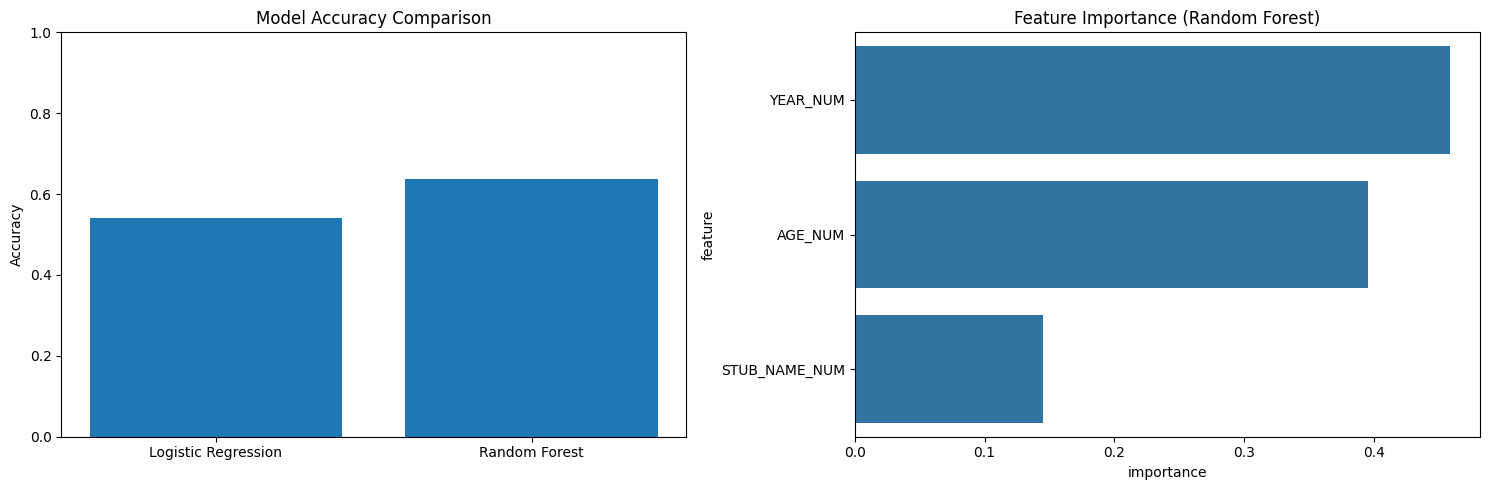


Regression Analysis - Obesity Data


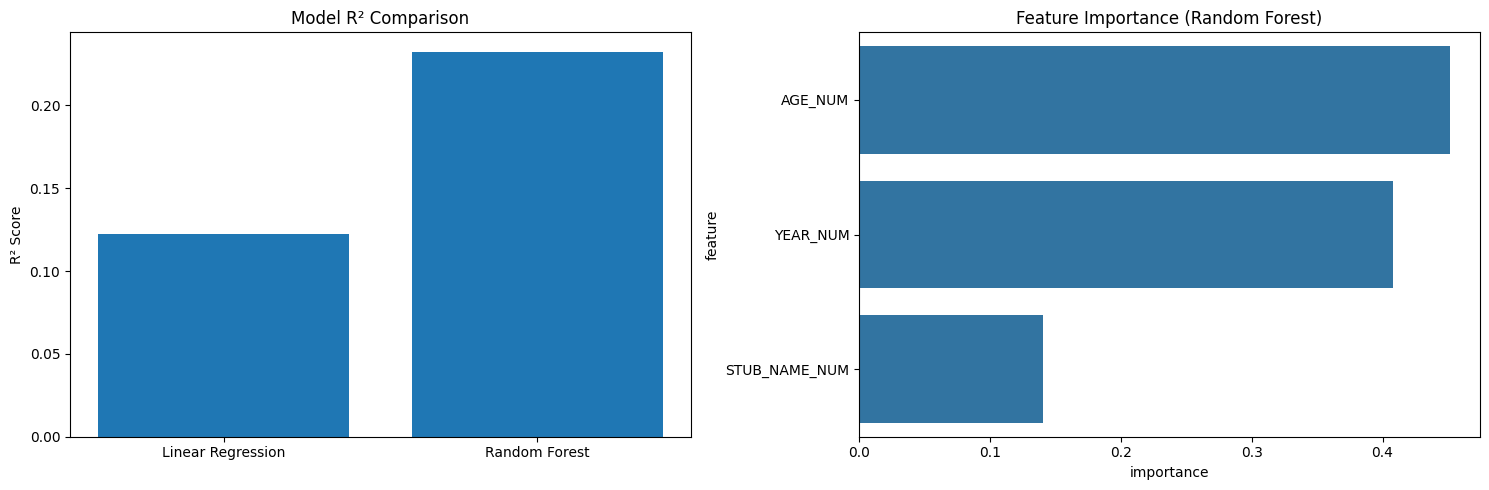


Classification Results - Obesity:

Logistic Regression:
Accuracy: 0.5407
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56        71
           1       0.52      0.52      0.52        64

    accuracy                           0.54       135
   macro avg       0.54      0.54      0.54       135
weighted avg       0.54      0.54      0.54       135


Random Forest:
Accuracy: 0.6370
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        71
           1       0.60      0.72      0.65        64

    accuracy                           0.64       135
   macro avg       0.64      0.64      0.64       135
weighted avg       0.65      0.64      0.64       135


Regression Results - Obesity:

Linear Regression:
MSE: 23.6113
R²: 0.1221

Random Forest:
MSE: 20.6442
R²: 0.2324


In [71]:
# Main analysis execution
def main():
    # Prepare datasets
    obesity_df = prepare_obesity_data(obesity_data)
    nutrition_df = prepare_nutrition_data(nutrition_data)

    # Classification Analysis for Obesity Data
    print("Classification Analysis - Obesity Data")
    X_obesity = obesity_df.drop(['high_obesity', 'ESTIMATE'], axis=1)
    y_obesity = obesity_df['high_obesity']
    class_results_obesity, X_test_o, y_test_o, scaler_o = train_classification_models(X_obesity, y_obesity)
    plot_classification_results(class_results_obesity, X_test_o, y_test_o, scaler_o)

    # Regression Analysis for Obesity Data
    print("\nRegression Analysis - Obesity Data")
    X_obesity_reg = obesity_df.drop(['high_obesity', 'ESTIMATE'], axis=1)
    y_obesity_reg = obesity_df['ESTIMATE']
    reg_results_obesity, X_test_or, y_test_or, scaler_or = train_regression_models(X_obesity_reg, y_obesity_reg)
    plot_regression_results(reg_results_obesity, X_test_or, y_test_or, scaler_or)

    # Print detailed results
    print("\nClassification Results - Obesity:")
    for model, metrics in class_results_obesity.items():
        print(f"\n{model}:")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print("Classification Report:")
        print(metrics['report'])

    print("\nRegression Results - Obesity:")
    for model, metrics in reg_results_obesity.items():
        print(f"\n{model}:")
        print(f"MSE: {metrics['mse']:.4f}")
        print(f"R²: {metrics['r2']:.4f}")

if __name__ == "__main__":
    main()

#Decision Tree Model

####The Decision Tree model was used for this obesity and nutrition analysis project because the variables used can easily be categorized into numerical and non-numerical, Without pre-processing, such flexibility is important in the mix of state locations, demography, and nutrition values. Decision Trees can easily model non-linearity and interactions between the features because of which they are ideal for modeling the Neighborhood characteristics, nutrition program participation and its impact on obesity trends. Furthermore, the model’s feature importance and decision rules make exportation important for healthcare decision makers to understand and explain the factors contributing to child obesity in the region.

In [72]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [73]:
def prepare_data_for_tree(obesity_data):
    """
    Prepare obesity dataset for decision tree analysis
    """
    # Select relevant features
    features = ['YEAR_NUM', 'AGE_NUM', 'STUB_NAME_NUM', 'ESTIMATE']
    df = obesity_data[features].copy()

    # Remove missing values
    df = df.dropna()

    # Create target variable (binary classification)
    median_obesity = df['ESTIMATE'].median()
    df['high_obesity'] = (df['ESTIMATE'] > median_obesity).astype(int)

    return df


In [74]:
def train_decision_tree(X, y, max_depth=5):
    """
    Train decision tree model and return results
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train model
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_model.fit(X_train, y_train)

    # Make predictions
    y_pred = dt_model.predict(X_test)

    # Calculate metrics
    results = {
        'model': dt_model,
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'feature_importance': pd.DataFrame({
            'feature': X.columns,
            'importance': dt_model.feature_importances_
        }).sort_values('importance', ascending=False),
        'X_test': X_test,
        'y_test': y_test,
        'y_pred': y_pred
    }

    return results

In [75]:
def plot_decision_tree_results(results, X):
    """
    Create visualizations for decision tree analysis
    """
    # Set up the matplotlib figure
    plt.figure(figsize=(20, 10))

    # Plot 1: Decision Tree Visualization
    plt.subplot(1, 3, 1)
    plot_tree(results['model'],
             feature_names=X.columns,
             class_names=['Low Obesity', 'High Obesity'],
             filled=True,
             rounded=True,
             fontsize=8)
    plt.title('Decision Tree Structure')

    # Plot 2: Feature Importance
    plt.subplot(1, 3, 2)
    sns.barplot(data=results['feature_importance'],
                x='importance',
                y='feature')
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')

    # Plot 3: Confusion Matrix
    plt.subplot(1, 3, 3)
    sns.heatmap(results['confusion_matrix'],
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=['Low Obesity', 'High Obesity'],
                yticklabels=['Low Obesity', 'High Obesity'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()

In [76]:
def evaluate_different_depths(X, y):
    """
    Evaluate model performance with different tree depths
    """
    depths = range(1, 11)
    accuracies = []

    for depth in depths:
        dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
        scores = cross_val_score(dt, X, y, cv=5)
        accuracies.append(scores.mean())

    plt.figure(figsize=(10, 6))
    plt.plot(depths, accuracies, marker='o')
    plt.title('Model Performance vs Tree Depth')
    plt.xlabel('Maximum Tree Depth')
    plt.ylabel('Cross-validation Accuracy')
    plt.grid(True)
    plt.show()

    return depths, accuracies

Preparing data...

Evaluating different tree depths...


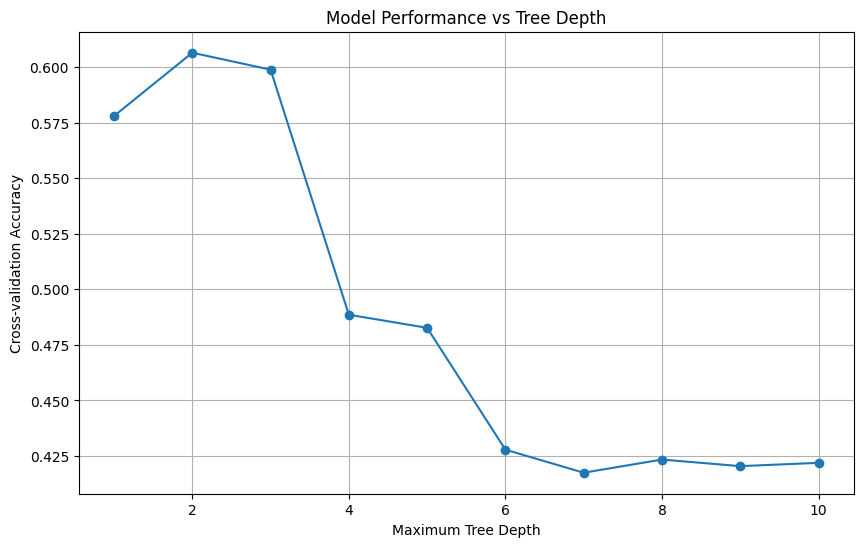


Optimal tree depth: 2

Training final model...

Generating visualizations...


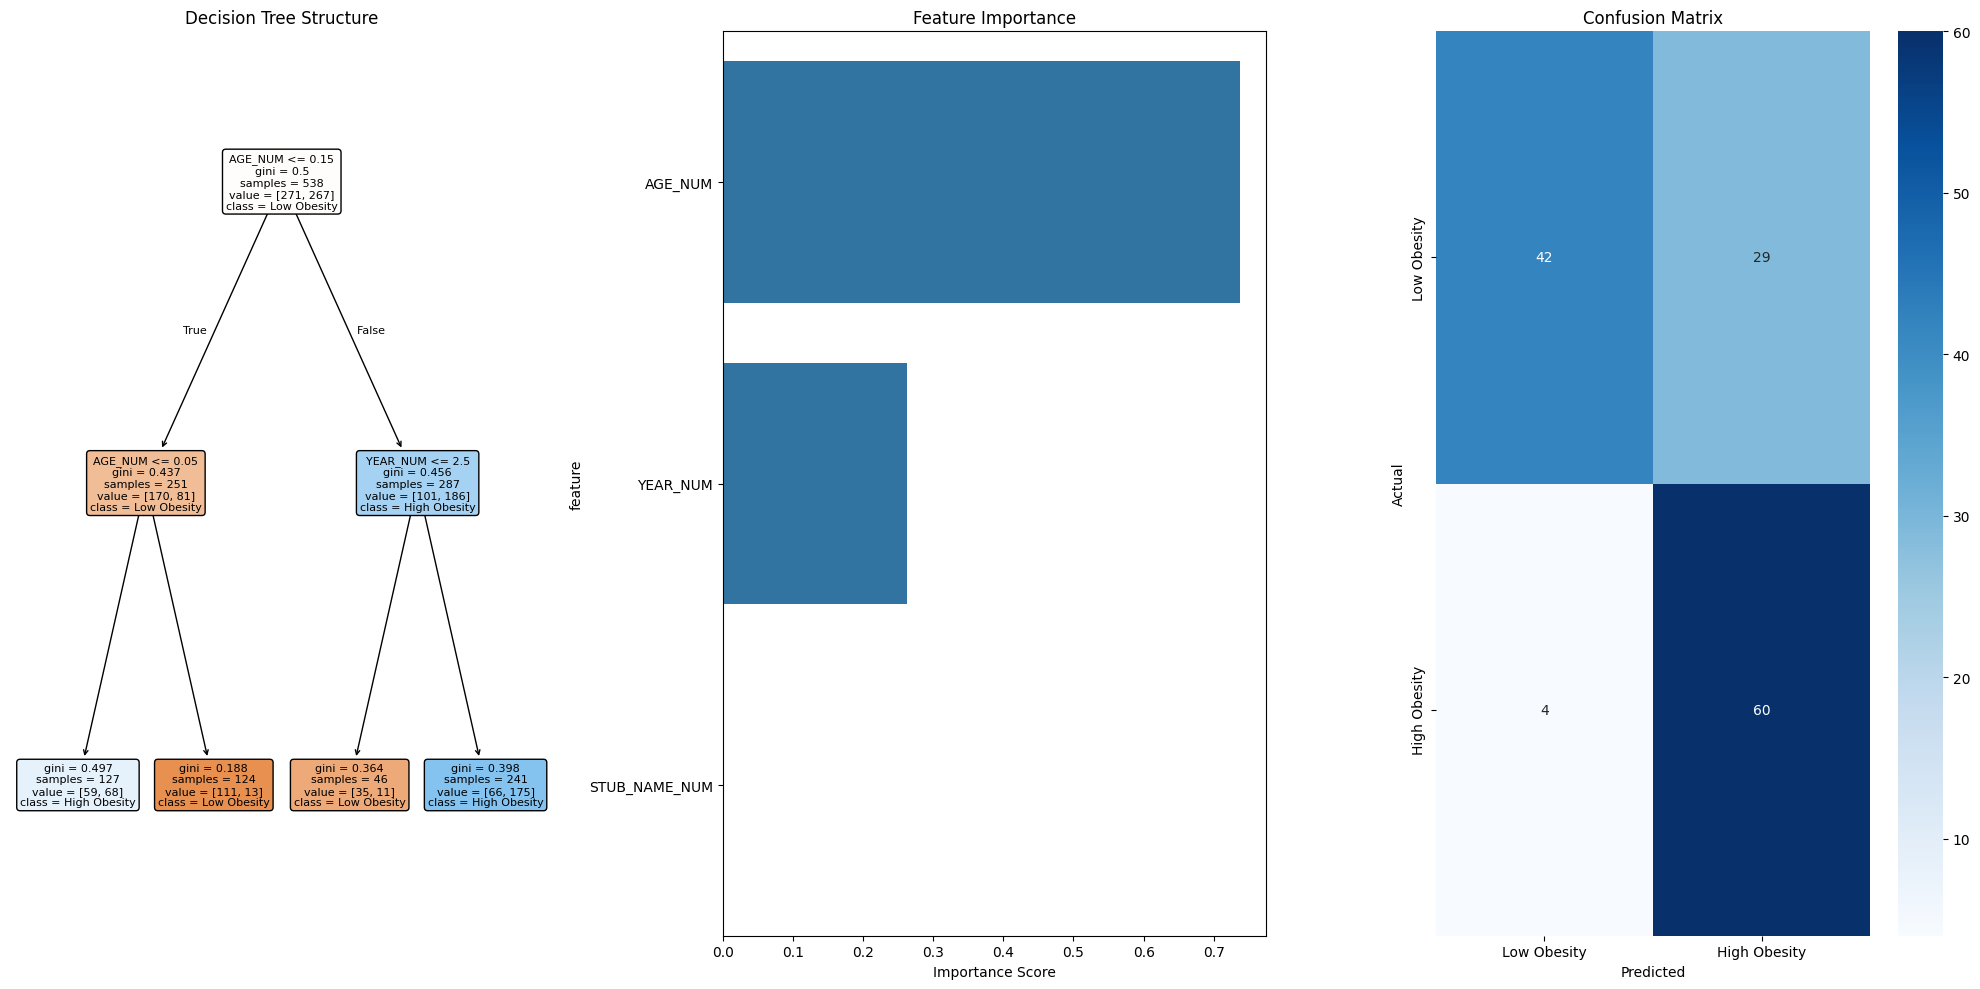


Model Performance:
Accuracy: 0.7556

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.59      0.72        71
           1       0.67      0.94      0.78        64

    accuracy                           0.76       135
   macro avg       0.79      0.76      0.75       135
weighted avg       0.80      0.76      0.75       135


Feature Importance:
         feature  importance
1        AGE_NUM    0.738017
0       YEAR_NUM    0.261983
2  STUB_NAME_NUM    0.000000


In [77]:
# Main execution
def main():
    # Prepare the data
    print("Preparing data...")
    prepared_data = prepare_data_for_tree(obesity_data)

    # Split features and target
    X = prepared_data.drop(['high_obesity', 'ESTIMATE'], axis=1)
    y = prepared_data['high_obesity']

    # Evaluate different tree depths
    print("\nEvaluating different tree depths...")
    depths, accuracies = evaluate_different_depths(X, y)

    # Find optimal depth
    optimal_depth = depths[np.argmax(accuracies)]
    print(f"\nOptimal tree depth: {optimal_depth}")

    # Train final model with optimal depth
    print("\nTraining final model...")
    results = train_decision_tree(X, y, max_depth=optimal_depth)

    # Plot results
    print("\nGenerating visualizations...")
    plot_decision_tree_results(results, X)

    # Print detailed results
    print("\nModel Performance:")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print("\nClassification Report:")
    print(results['classification_report'])

    print("\nFeature Importance:")
    print(results['feature_importance'])

if __name__ == "__main__":
    main()

#Hyperparameter Tuning

####To improve the Decision Tree’s performance and avoid overfitting due to the heteroscedasticity of the obesity and nutrition data, hyperparameter tuning was performed. Complexity + ability to generalize is another hyperparameter we might want to tune: this can be done with the help of GridSearchCV, RandomizedSearchCV, using max_depth, min_samples_split, min_samples_leaf as feature values. This tuning process assists the model in achieving its training goal of distinguishing between real signal in Nutrition programs as the input and obesity levels as output and noise in the training set. , other parameters such as the max depth decides how deep the tree can grow while min samples split and min samples leaf help decide how detailed split rules should be in order to arrive at more accurate results and generate more hypothesis on factors behind the high rates of obesity among children.

In [78]:
!pip install scikit-learn

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, make_scorer
from sklearn.model_selection import learning_curve

In [80]:
def prepare_data_for_tuning(obesity_data):
    """
    Prepare obesity dataset for hyperparameter tuning
    """
    # Select features
    features = ['YEAR_NUM', 'AGE_NUM', 'STUB_NAME_NUM', 'ESTIMATE']
    df = obesity_data[features].copy()

    # Remove missing values
    df = df.dropna()

    # Create target variable
    median_obesity = df['ESTIMATE'].median()
    df['high_obesity'] = (df['ESTIMATE'] > median_obesity).astype(int)

    return df

In [81]:
def grid_search_tuning(X_train, y_train):
    """
    Perform Grid Search for hyperparameter tuning
    """
    # Define parameter grid
    param_grid = {
        'max_depth': [3, 5, 7, 9, 11],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy'],
        'max_features': ['auto', 'sqrt', 'log2'],
        'class_weight': [None, 'balanced']
    }

    # Create decision tree classifier
    dt = DecisionTreeClassifier(random_state=42)

    # Create grid search object
    grid_search = GridSearchCV(
        estimator=dt,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        scoring='accuracy',
        verbose=1
    )

    # Perform grid search
    grid_search.fit(X_train, y_train)

    return grid_search

In [82]:
def random_search_tuning(X_train, y_train):
    """
    Perform Random Search for hyperparameter tuning
    """
    # Define parameter distributions
    param_dist = {
        'max_depth': np.arange(3, 15),
        'min_samples_split': np.arange(2, 20),
        'min_samples_leaf': np.arange(1, 10),
        'criterion': ['gini', 'entropy'],
        'max_features': ['auto', 'sqrt', 'log2'],
        'class_weight': [None, 'balanced']
    }

    # Create decision tree classifier
    dt = DecisionTreeClassifier(random_state=42)

    # Create random search object
    random_search = RandomizedSearchCV(
        estimator=dt,
        param_distributions=param_dist,
        n_iter=100,
        cv=5,
        n_jobs=-1,
        scoring='accuracy',
        verbose=1,
        random_state=42
    )

    # Perform random search
    random_search.fit(X_train, y_train)

    return random_search

In [83]:
def plot_parameter_importances(search_results, search_type):
    """
    Plot importance of different parameters
    """
    # Get CV results
    cv_results = pd.DataFrame(search_results.cv_results_)

    # Calculate parameter importance
    param_importance = []
    for param in search_results.best_params_:
        param_values = cv_results[f'param_{param}'].astype(str)
        unique_values = param_values.unique()
        if len(unique_values) > 1:
            scores = [cv_results[cv_results[f'param_{param}'] == val]['mean_test_score'].mean()
                     for val in unique_values]
            importance = max(scores) - min(scores)
            param_importance.append({'parameter': param, 'importance': importance})

    # Create importance plot
    param_imp_df = pd.DataFrame(param_importance)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=param_imp_df, x='parameter', y='importance')
    plt.title(f'Parameter Importance - {search_type}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [84]:
def evaluate_tuned_model(model, X_test, y_test):
    """
    Evaluate the tuned model's performance
    """
    y_pred = model.predict(X_test)

    results = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }

    return results

In [85]:
def plot_learning_curves(model, X_train, y_train):
    """
    Plot learning curves for the tuned model
    """
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_sizes, train_scores, test_scores = learning_curve(
        model,
        X_train,
        y_train,
        cv=5,
        train_sizes=train_sizes,
        scoring='accuracy'
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Accuracy score')
    plt.title('Learning Curves')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

Preparing data...

Performing Grid Search...
Fitting 5 folds for each of 540 candidates, totalling 2700 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
900 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
486 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti


Performing Random Search...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
98 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils


Grid Search Results:
Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best score: 0.7361889927310489

Random Search Results:
Best parameters: {'min_samples_split': 19, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 4, 'criterion': 'entropy', 'class_weight': 'balanced'}
Best score: 0.726895119418484


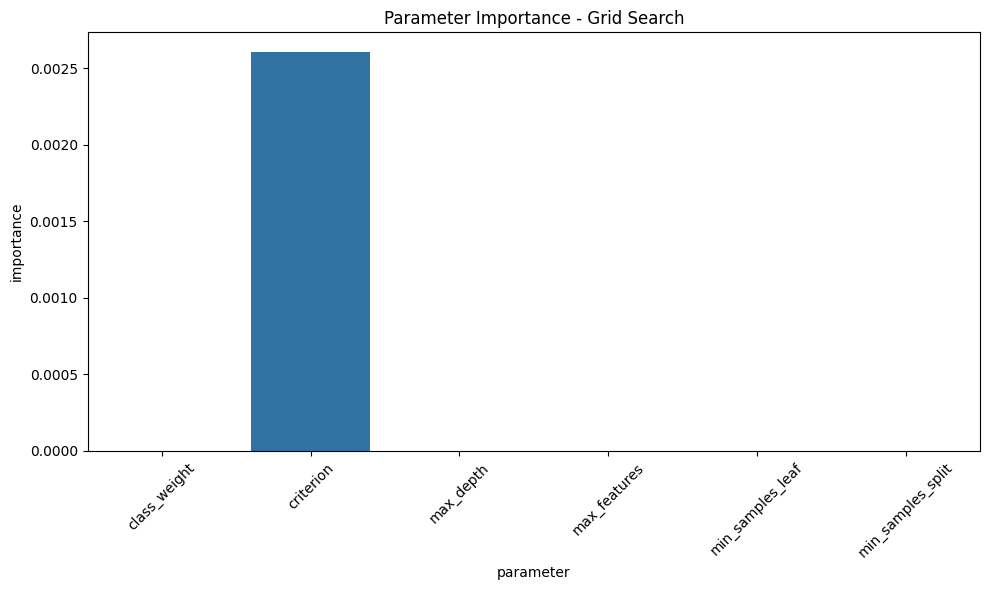

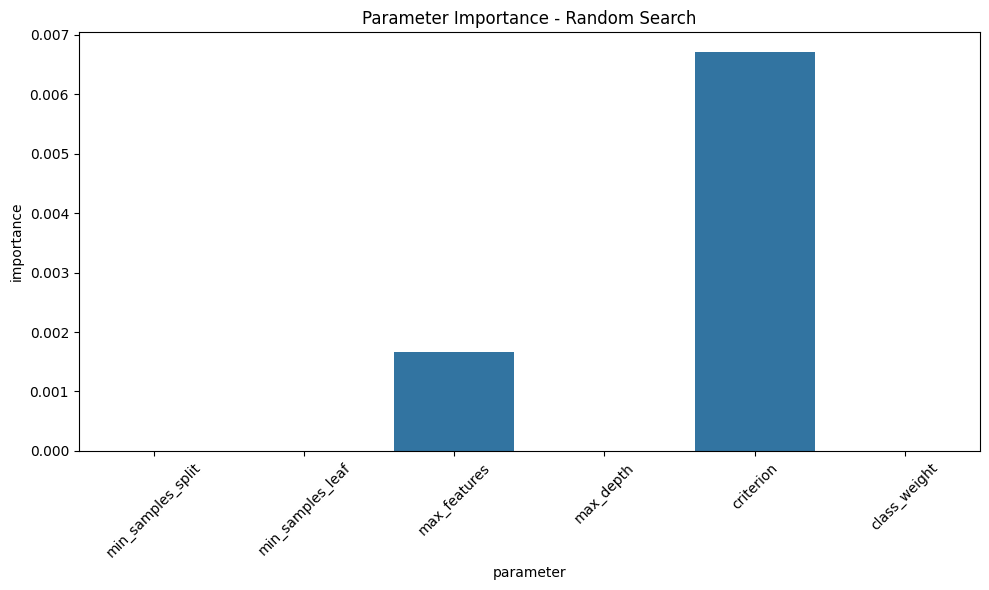


Evaluating Grid Search model:
Accuracy: 0.7333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.56      0.69        71
           1       0.66      0.92      0.77        64

    accuracy                           0.73       135
   macro avg       0.77      0.74      0.73       135
weighted avg       0.78      0.73      0.73       135


Evaluating Random Search model:
Accuracy: 0.7925925925925926

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.62      0.76        71
           1       0.70      0.98      0.82        64

    accuracy                           0.79       135
   macro avg       0.84      0.80      0.79       135
weighted avg       0.85      0.79      0.79       135


Plotting learning curves...


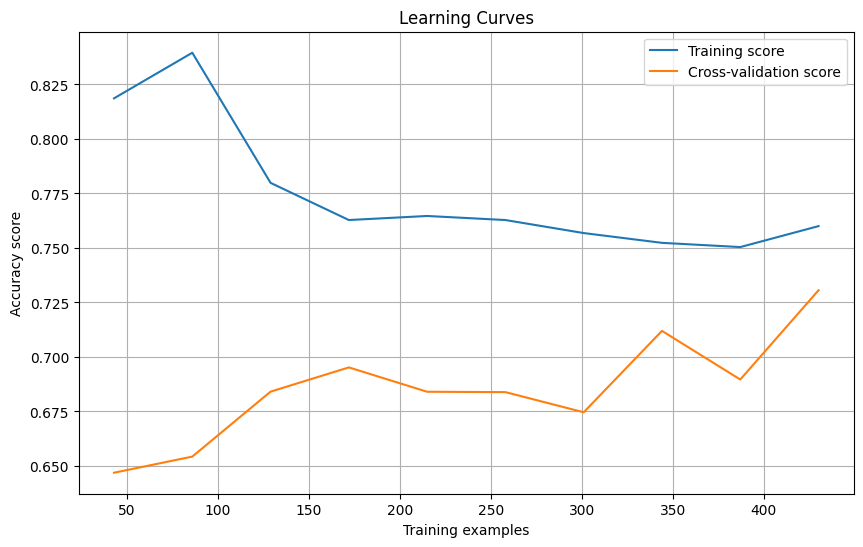

In [86]:
# Main execution
def main():
    # Prepare data
    print("Preparing data...")
    prepared_data = prepare_data_for_tuning(obesity_data)

    # Split features and target
    X = prepared_data.drop(['high_obesity', 'ESTIMATE'], axis=1)
    y = prepared_data['high_obesity']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Perform Grid Search
    print("\nPerforming Grid Search...")
    grid_search_results = grid_search_tuning(X_train, y_train)

    # Perform Random Search
    print("\nPerforming Random Search...")
    random_search_results = random_search_tuning(X_train, y_train)

    # Print results
    print("\nGrid Search Results:")
    print("Best parameters:", grid_search_results.best_params_)
    print("Best score:", grid_search_results.best_score_)

    print("\nRandom Search Results:")
    print("Best parameters:", random_search_results.best_params_)
    print("Best score:", random_search_results.best_score_)

    # Plot parameter importances
    plot_parameter_importances(grid_search_results, "Grid Search")
    plot_parameter_importances(random_search_results, "Random Search")

    # Evaluate final models
    print("\nEvaluating Grid Search model:")
    grid_results = evaluate_tuned_model(grid_search_results.best_estimator_, X_test, y_test)
    print("Accuracy:", grid_results['accuracy'])
    print("\nClassification Report:")
    print(grid_results['classification_report'])

    print("\nEvaluating Random Search model:")
    random_results = evaluate_tuned_model(random_search_results.best_estimator_, X_test, y_test)
    print("Accuracy:", random_results['accuracy'])
    print("\nClassification Report:")
    print(random_results['classification_report'])

    # Plot learning curves for best model
    print("\nPlotting learning curves...")
    best_model = grid_search_results.best_estimator_ if grid_search_results.best_score_ > random_search_results.best_score_ else random_search_results.best_estimator_
    plot_learning_curves(best_model, X_train, y_train)

if __name__ == "__main__":
    main()

#Conclusion

Exploring the case of childhood obesity and nutrition programs in the United States, this paper detects many trends and gaps considering social demographics and district zones. The study established that obesity rates began rising in all the age groups starting from 2015 with teenagers and adolescents (12-19 years) are most affected with the obesity rate of nearly 22%. Qualitative analysis of the ACS survey on nutrition program participation reveals large departure at state level; with states such as Virginia Alaska and South Dakota boasting the highest ACS participation at a little over 17% and 18% respectively while Colorado’s ACS participation stood at approximately 10%. The continuing racially and ethnically differed obesity pattern is also taken into consideration in the analysis and has called for even a more nuanced approach to the issue.

Obesity and nutrition program data are significant in enhancing a number of public health operations and formulating policies. Regression analyses and decision trees used herein provide insights into the factors that define trends in children obesity rates as well as the effectiveness of the programme in question. Based on these findings it can be concluded that despite the fact most nutritional programs are deployed around the intended beneficiaries and often well endorsed by them, they do not elicit the same level of effectiveness given differing population and geographical responses. Hence, the exploration –based analysis lends support for call for more focused, population sensitive practices in combating childhood obesity based on age, geographical and demographic jurisdiction. Programs for the future should aim at targeting more vulnerable population through both promoting program participation in areas of great need and designing programs that meet the needs of high-risk populations including adolescents and racial/ethnic minorities most at risk for obesity.